In [20]:
import os
import pickle
import sys 
project_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))
sys.path.append(project_path)
import re
import numpy as np 
import matplotlib.pyplot as plt

In [22]:
directory_path ='../data/TetQ2500inter_1min_chunk/'

def extract_range_from_filename(filename):
    match = re.search(r'_(\d+)-(\d+)', filename)
    if match:
        start = int(match.group(1))
        end = int(match.group(2))
        return range(start, end)
    return None

mean_delta_h = np.empty(2100)
mean_delta_u = np.empty(2100)
mean_delta_v = np.empty(2100)

for filename in os.listdir(directory_path):
    # Vérifie si le fichier a l'extension .pickle
    if filename.endswith('.pkl'):
        filepath = os.path.join(directory_path, filename)
        # Charge le fichier pickle
        timespan = extract_range_from_filename(filepath)
        inter_array = np.empty((len(timespan),3))
        with open(filepath, 'rb') as file:
            datas = pickle.load(file)
            for index,(x,y) in enumerate(datas) :
                inter_array[index,:] = np.mean(np.abs(y),axis=0)
            
            mean_delta_h[timespan] = inter_array[:,0]
            mean_delta_u[timespan] = inter_array[:,1]
            mean_delta_v[timespan] = inter_array[:,2]
            


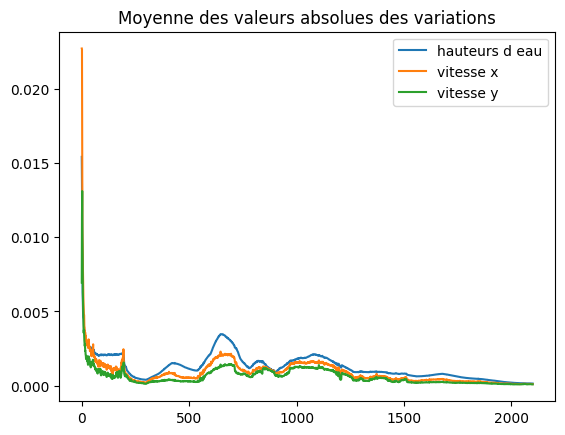

In [32]:
plt.figure()
plt.title('Moyenne des valeurs absolues des variations')
plt.plot(mean_delta_h,label= 'hauteurs d eau')
plt.plot(mean_delta_u,label= 'vitesse x')
plt.plot(mean_delta_v,label= 'vitesse y')
plt.legend()
plt.show()

In [36]:
nb_cell_delta_h = np.empty(2100)

for filename in os.listdir(directory_path):
    # Vérifie si le fichier a l'extension .pickle
    if filename.endswith('.pkl'):
        filepath = os.path.join(directory_path, filename)
        # Charge le fichier pickle
        timespan = extract_range_from_filename(filepath)
        inter_array = np.empty((len(timespan)))
        with open(filepath, 'rb') as file:
            datas = pickle.load(file)
            for index,(x,y) in enumerate(datas) :
                inter_array[index] = np.sum(np.abs(y[:,0])>0)
            
            nb_cell_delta_h[timespan] = inter_array

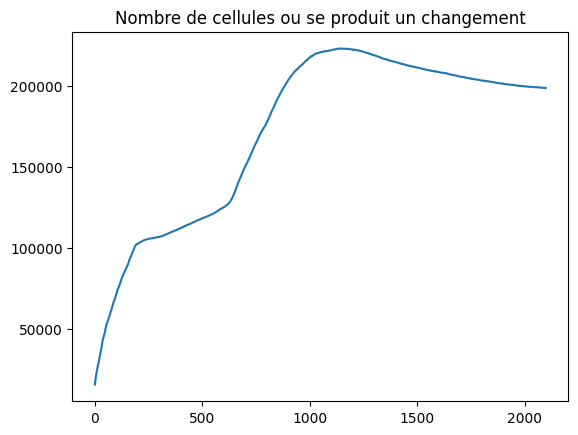

In [38]:
plt.figure()
plt.title('Nombre de cellules ou se produit un changement')
plt.plot(nb_cell_delta_h)
plt.show()

In [39]:
mean_wc_delta_h = np.empty(2100)
mean_wc_delta_u = np.empty(2100)
mean_wc_delta_v = np.empty(2100)

for filename in os.listdir(directory_path):
    # Vérifie si le fichier a l'extension .pickle
    if filename.endswith('.pkl'):
        filepath = os.path.join(directory_path, filename)
        # Charge le fichier pickle
        timespan = extract_range_from_filename(filepath)
        inter_array = np.empty((len(timespan),3))
        with open(filepath, 'rb') as file:
            datas = pickle.load(file)
            for index,(x,y) in enumerate(datas) :
                inter_array[index,:] = np.mean(np.abs(y)[np.abs(y[:,0]>0)],axis=0)
            
            mean_wc_delta_h[timespan] = inter_array[:,0]
            mean_wc_delta_u[timespan] = inter_array[:,1]
            mean_wc_delta_v[timespan] = inter_array[:,2]

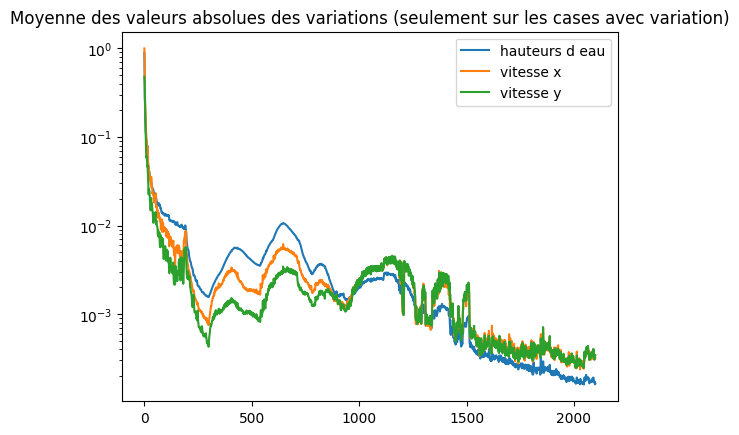

In [41]:
plt.figure()
plt.title('Moyenne des valeurs absolues des variations (seulement sur les cases avec variation)')
plt.plot(mean_wc_delta_h,label= 'hauteurs d eau')
plt.plot(mean_wc_delta_u,label= 'vitesse x')
plt.plot(mean_wc_delta_v,label= 'vitesse y')
plt.yscale('log')
plt.legend()
plt.show()